# TP2 

### Exercice 1 : Les bases

1.1)
Dans un système binaire l'information est représenté par des 0 et des 1 (d'où le nom binaire), c'est 0 et 1 sont stockés dans des bits qui peuvent soit être 0 ou 1.
Pour avoir des informations plus complexe que des booléens on utilise l'octet qui est un séquence de 8bits.

1.2)
Dans l'architecture d'un ordinateur pour créer la logique et manipuler l'information contenu dans les bits on utilise des portes:
La porte NOT qui renvoie le bit inverse : 1 -> 0 et 0->1
La porte AND à deux bits si elle recoit deux bits de valeur elle renvoie 1 sinon elle renvoie 0
La porte OR à deuxw bits qui si elle reçoit 10 ou 11 ou 01 renvoie 1 | 00 -> 0
La porte XOR (ou exclusif) renvoie 1 uniquement si UN seul des deux bits qu'elle reçoit est vraie | 11 -> 0

2)
Un qubit peut être soit l'état |0> soit dans l'état |1> soit en superposition quantique càd dans les deux états à la fois :
|ψ⟩ = 𝛼. |0⟩ + 𝛽. |1⟩ , avec la norme du qubit toujours égale 1

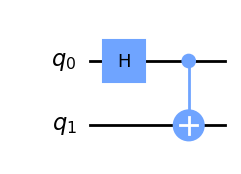

In [1]:
import numpy as np
import matplotlib as plt
import time 
from qiskit import *
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import *



#Création d’un circuit quantique à 2 qubits
circ = QuantumCircuit(2)
#Adding an Hadamard gate for the firt : (qubit) 0 => superposition
circ.h(0)
# Ajouter l’opération CNOT avec 0 comme qubit de control et le qubit 1 comme cible
# => état de Bell
circ.cx(0, 1)
#Afficher le circuit :
circ.draw('mpl')
#lala


# Exercice 2 : Les portes



#### 1) Porte H :
$$ \text{Porte qui permet de mettre un qubit en superposition quantique avec environ 50\% de |0> et de |1> } $$ 
$$ \begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix}\times\frac{1}{\sqrt{2}}
\quad\text{Matrice de passage H}
\\ $$
$$
H \times q_{0} = H \times \begin{pmatrix}1\\0\end{pmatrix} = \frac{1}{\sqrt{2}} \times \begin{pmatrix}1\\1\end{pmatrix}
\quad \quad \text{ Ici } q_{0} = \ket{0}$$


 qubits d'entrée : |0> 

Proba de qubits de sortie (sur 1000 mesures) : {'0': 466, '1': 534}


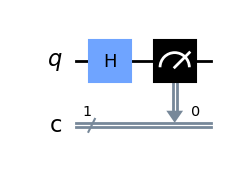

In [ ]:
circ = QuantumCircuit(1,1)
simulator = QasmSimulator()

def hadamar(q0):
    if q0 == 1:
        circ.x(0)
    circ.h(0)
    #Measure :
    circ.measure([0],[0])
    compiled_circuit = transpile(circ, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(circ)
    print(f"\nProba de qubits de sortie (sur 1000 mesures) :",counts)

    return counts



q0 = int(input("Saisir la 1 valeur de q0 :  ex |0>  "))
print(f"\n qubits d'entrée : |{q0}> ")
counts = hadamar(q0)

circ.draw('mpl')

#### Porte X (NOT) :
 $$ \text{Porte qui donne l'inverse d'un qubit :}  $$
$$ \begin{pmatrix}
0 & 1 \\ 
1 & 0
\end{pmatrix} \quad \text{Matrice de passage X} \\ $$
$$ \\
X \times q_0 = X \times \begin{pmatrix}1 \\ 0\end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}
\quad \quad | \quad q_0 = \ket{0} $$

Intialiser le qubit : ex |0>


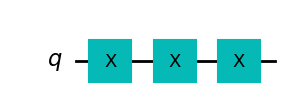

In [ ]:
circ = QuantumCircuit(1)
circ.x(0)
def qubit_not(q0):
    if q0 ==0:
        circ.x(0)
    circ.x(0)

print("Intialiser le qubit : ex |0>")
q0 = int(input("q0 :"))
qubit_not(q0)
circ.draw('mpl')

#### Porte CNOT :
$$ \text{Porte à deux qubit, le premier qubit sert de contrôle, l'autre est celui affecté par le NOT ou non, si le contrôle est vrai (q0 correspond à |1>) alors il y a NOT sur l'autre qubit sinon rien ne se passe:}  $$  
  
    
$$ \begin{pmatrix}
1&0&0&0 \\ 
0&1&0&0 \\ 
0&0&0&\color{orange}{1} \\ 
0&0&\color{orange}{1}&0 \\ 
\end{pmatrix} \quad \text{Matrice de passage P} \quad \quad \text{| Indication :} \begin{pmatrix}a\\b\\c\\d\end{pmatrix} \begin{matrix}\ket{00}\\\ket{01}\\\ket{10}\\\ket{11}\end{matrix} \\ $$


$$ \\
P \times q_0\:q_1 = P \times \ket{10} = P \times \begin{pmatrix}0\\0\\1\\0\end{pmatrix} = \begin{pmatrix}0\\0\\0\\1\end{pmatrix} = \ket{11}
\quad \quad |\quad q_0 = \ket{1} \quad q_1=\ket{0} \quad \quad \text{Soit leur produit tensoriel : } \ket{10} $$
$$ \\
P \times q_0\:q_1 = P \times \ket{00} = P \times \begin{pmatrix}1\\0\\0\\0\end{pmatrix} = \begin{pmatrix}1\\0\\0\\0\end{pmatrix} = \ket{00}
\quad \quad |\quad q_0 = \ket{1} \quad q_1=\ket{0} \quad \quad \text{On voit que pour |00> rien ne change avec CNOT } $$

Intialiser les qubits : ex |01>

 Qubits d'entrée : |00> 

Proba de qubits de sortie (1000 try) : {'00': 1000}


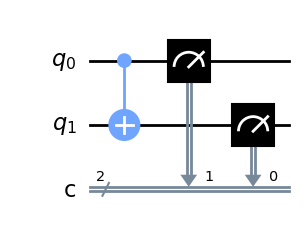

In [ ]:
circ = QuantumCircuit(2,2)
simulator = QasmSimulator()

def cnot(q0, q1):
    if q0 ==1 :
        circ.x(0)
    if q1 ==1 :
        circ.x(1)
    circ.cx(0, 1)
    
    #Measure :
    circ.measure([0,1],[1, 0])
    compiled_circuit = transpile(circ, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(circ)
    print(f"\nProba de qubits de sortie (1000 try) :",counts)


print("Intialiser les qubits : ex |01>")
q0 = int(input("q0 :"))
q1 = int(input("q1 :"))
print(f"\n Qubits d'entrée : |{q0}{q1}> ")
cnot(q0, q1)
circ.draw('mpl')

#### Porte SWAP :
$$ \text{Porte à deux qubit, le premier qubit sert de contrôle, l'autre est celui affecté par le NOT ou non, si le contrôle est vrai (q0 correspond à |1>) alors il y a NOT sur l'autre qubit sinon rien ne se passe:}  $$
$$ \begin{pmatrix}
1&0&0&0 \\ 
0&0&\color{orange}{1}&0 \\ 
0&\color{orange}{1}&0&0 \\ 
0&0&0&1 \\ 
\end{pmatrix} \quad \text{Matrice de passage P} \\ $$
$$ \\
P \times q_0\:q_1 = P \times \ket{10} = P \times \begin{pmatrix}0\\0\\1\\0\end{pmatrix} = \begin{pmatrix}0\\1\\0\\0\end{pmatrix} = \ket{11}
\quad \quad |\quad q_0 = \ket{1} \quad q_1=\ket{0}$$

Intialiser les qubits : ex |01>

 Qubits d'entrée : |00> 

Proba de qubits de sortie (1000 try) : {'00': 1000}


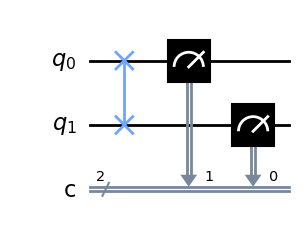

In [ ]:
circ = QuantumCircuit(2,2)
simulator = QasmSimulator()

def swap(q0, q1):
    if q0 ==1 :
        circ.x(0)
    if q1 ==1 :
        circ.x(1)
    circ.swap(0, 1)

    #Measure :
    circ.measure([0,1],[1, 0])
    compiled_circuit = transpile(circ, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(circ)
    print(f"\nProba de qubits de sortie (1000 try) :",counts)


print("Intialiser les qubits : ex |01>")
q0 = int(input("Saisir q0 :"))
q1 = int(input("Saisir q1 :"))
print(f"\n Qubits d'entrée : |{q0}{q1}> ")
swap(q0, q1)
circ.draw('mpl')

#### Porte CSWAP :
$$ \text{ Porte à 3 qubits qui échangent les valeurs de 2qubits s'ils en ont des différentes et que le premier qubit correspond à une valeur vraie (1):
}  $$
$$ \begin{pmatrix}
1&0&0&0&0&0&0&0 \\ 
0&1&0&0&0&0&0&0 \\ 
0&0&1&0&0&0&0&0 \\ 
0&0&0&1&0&0&0&0 \\ 
0&0&0&0&1&0&0&0 \\ 
0&0&0&0&0&0&\color{orange}{1}&0 \\ 
0&0&0&0&0&\color{orange}{1}&0&0 \\ 
0&0&0&0&0&0&0&1 \\ 
\end{pmatrix} \quad \text{Matrice de passage P} \quad \quad \text{| Indication :} \begin{pmatrix}a\\b\\c\\d\\k\\l\\m\\n\end{pmatrix} \begin{matrix}\ket{000}\\\ket{001}\\\ket{010}\\\ket{011}\\\ket{100}\\\ket{101}\\\ket{110}\\\ket{111}\end{matrix} \\ $$
$$ \\
P \times q_0\:q_1\:q_2 = P \times \ket{101} = P \times \begin{pmatrix}0\\0\\0\\0\\0\\1\\0\\0\end{pmatrix} = \begin{pmatrix}0\\0\\0\\0\\0\\0\\1\\0\end{pmatrix} = \ket{110}
\quad \quad |\quad q_0 = \ket{1} \quad q_1=\ket{0} \quad q_2=\ket{0}$$

Choisir les valeurs d'entrée des 3 qubits | ex : |110>

 qubits d'entrée : |000> 

Proba de qubits de sortie (1000 try) : {'000': 1000}


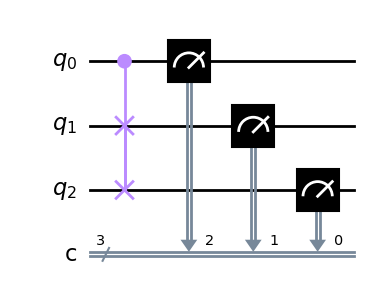

In [ ]:
circ = QuantumCircuit(3,3)
simulator = QasmSimulator()

def ctrlswap(q0, q1, q2):
    if q0 == 1 :
        circ.x(0)
    if q1 == 1 :
        circ.x(1)
    if q2 == 1 :
        circ.x(2)
    circ.cswap(0, 1, 2)
    #Measure :
    circ.measure([0,1,2],[2, 1, 0])
    compiled_circuit = transpile(circ, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(circ)
    print(f"\nProba de qubits de sortie (1000 try) :",counts)

    
print("Choisir les valeurs d'entrée des 3 qubits | ex : |110>")
q0 = int(input("Entrer la valeur de q0 : "))
q1 = int(input("Entrer la valeur de q1 : "))
q2 = int(input("Entrer la valeur de q2 : "))
print(f"\n qubits d'entrée : |{q0}{q1}{q2}> ")
ctrlswap(q0, q1, q2)
circ.draw('mpl')

#### Porte TOF (CCNOT) :
$$ \text{  Porte à 3 qubits similaire à la porte CNOT sauf qu'il ya deux contrôles cette fois :}  $$
$$ \begin{pmatrix}
1&0&0&0&0&0&0&0 \\ 
0&1&0&0&0&0&0&0 \\ 
0&0&1&0&0&0&0&0 \\ 
0&0&0&1&0&0&0&0 \\ 
0&0&0&0&1&0&0&0 \\ 
0&0&0&0&0&0&1&0 \\ 
0&0&0&0&0&0&0&\color{orange}{1} \\ 
0&0&0&0&0&0&\color{orange}{1}&0 \\ 
\end{pmatrix} \quad \text{Matrice de passage P} \quad \quad \text{| Indication :} \begin{pmatrix}a\\b\\c\\d\\k\\l\\m\\n\end{pmatrix} \begin{matrix}\ket{000}\\\ket{001}\\\ket{010}\\\ket{011}\\\ket{100}\\\ket{101}\\\ket{110}\\\ket{111}\end{matrix} \\ $$
$$ \\
P \times q_0\:q_1\:q_2 = P \times \ket{110} = P \times \begin{pmatrix}0\\0\\0\\0\\0\\0\\1\\0\end{pmatrix} = \begin{pmatrix}0\\0\\0\\0\\0\\0\\0\\1\end{pmatrix} = \ket{111}
\quad \quad |\quad q_0 = \ket{1} \quad q_1=\ket{1} \quad q_2=\ket{0}$$

Choisir les valeurs d'entrée des 3 qubits | ex : |110>

 qubits d'entrée : |000> 

Proba de qubits de sortie (sur 1000 mesures) : {'000': 1000}


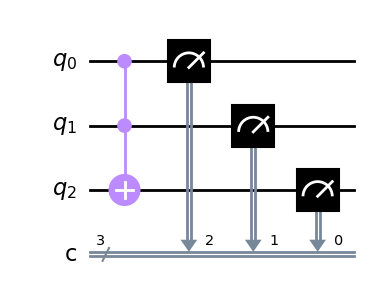

In [ ]:
circ = QuantumCircuit(3,3) 
simulator = QasmSimulator()

def ccnot(q0, q1, q2):
    if q0 == 1 :
        circ.x(0)
    if q1 == 1 :
        circ.x(1)
    if q2 == 1 :
        circ.x(2)
    circ.ccx(0, 1, 2)

    #Measure :
    circ.measure([0,1,2],[2, 1, 0])
    compiled_circuit = transpile(circ, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(circ)
    print(f"\nProba de qubits de sortie (sur 1000 mesures) :",counts)
    return counts

    
print("Choisir les valeurs d'entrée des 3 qubits | ex : |110>")
q0 = int(input("Entrer la valeur de q0 : "))
q1 = int(input("Entrer la valeur de q1 : "))
q2 = int(input("Entrer la valeur de q2 : "))
print(f"\n qubits d'entrée : |{q0}{q1}{q2}> ")
result = ccnot(q0, q1, q2)
circ.draw('mpl')

2.

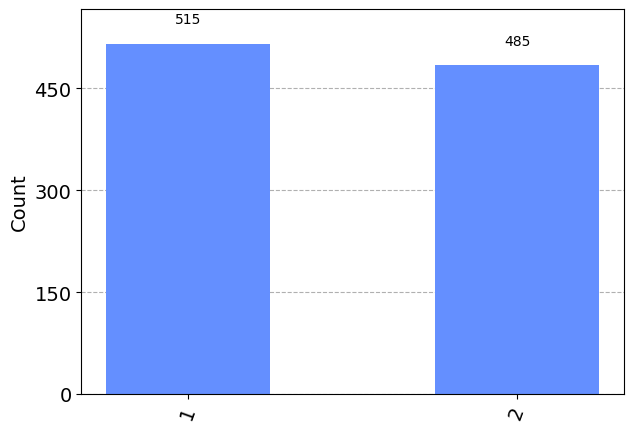

In [ ]:
#Measuring the qubits

"""
circuit.measure([ Qubits ] ,[Classical bits])

simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000) #by default 1024 shots
result = job.result()
counts = result.get_counts(circuit)  # counts can then be used with the plots
print("\nTotal count for 00 and 11 are:",counts) 
"""
#example :
counts = {'1':515, '2':485}
plot_histogram(counts)

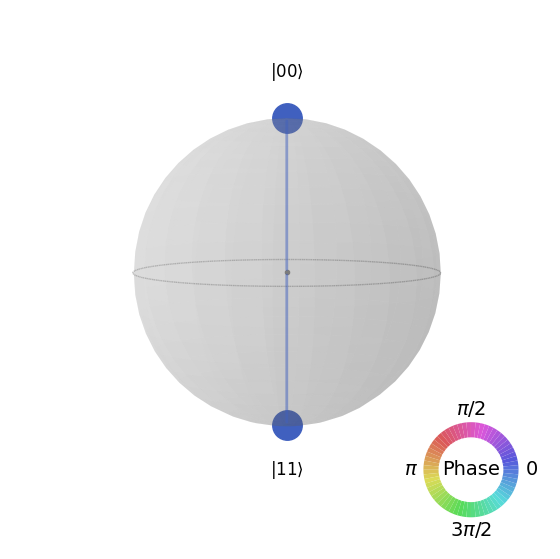

In [1]:
# Plot the Bloch sphere
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

state = Statevector(qc)
plot_state_qsphere(state)

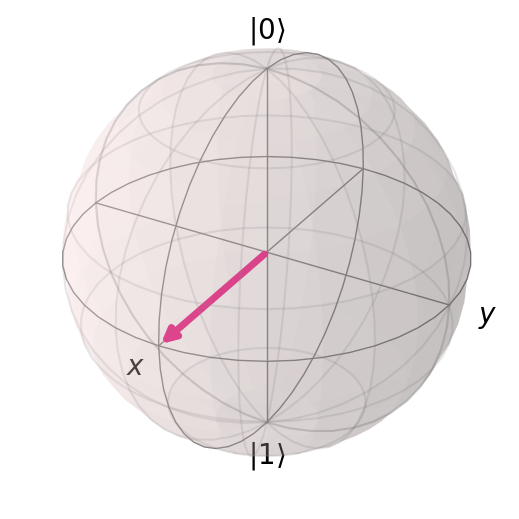

In [2]:
#Plot the bloch sphere vector :
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([1, 0, 0])

#### 4)  Différent SWAP et CSWAP

On à déja vu précedemment ces deux actions à une porte cependant il est aussi possible d'implémenter un swap avec trois portes CNOT :     
  
 $$ CNOT : (x,y) \rightarrow (x, x \oplus y) $$ 
D'après la notation de CNOT on a pour les trois CNOT sachant que la deuxième porte CNOT a la bit de controle sur y : $$\begin{matrix} x \\ \\  y\end{matrix}  \xrightarrow[\text{ }]{\text{1ere porte}} \begin{matrix} x \\ \\ x \oplus y\end{matrix} 
 \xrightarrow[\text{}]{\text{2nd porte} }  \begin{matrix} x \oplus x \oplus y = y \\ \\ x \oplus y\end{matrix} \xrightarrow[\text{}]{\text{3ème porte} }  \begin{matrix} y \\ \\ x \oplus y \oplus y = x\end{matrix} $$ 

Intialiser les qubits : ex |01>

 Qubits d'entrée : |00> 

Proba de qubits de sortie (1000 try) : {'00': 1000}


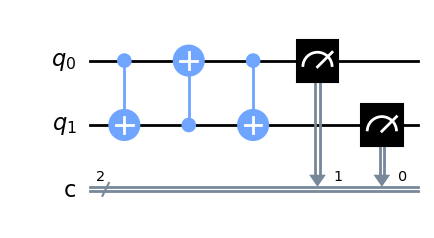

In [ ]:
circ = QuantumCircuit(2,2)
simulator = QasmSimulator()

def cnot(q0, q1):
    if q0 ==1 :
        circ.x(0)
    if q1 ==1 :
        circ.x(1)
    circ.cx(0, 1)
    circ.cx(1, 0)
    circ.cx(0, 1)
    
    #Measure :
    circ.measure([0,1],[1, 0])
    compiled_circuit = transpile(circ, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(circ)
    print(f"\nProba de qubits de sortie (1000 try) :",counts)


print("Intialiser les qubits : ex |01>")
q0 = int(input("q0 :"))
q1 = int(input("q1 :"))
print(f"\n Qubits d'entrée : |{q0}{q1}> ")
cnot(q0, q1)
circ.draw('mpl')
#circ.draw() # Draw with character not an image



####   CSwap :
  
On peut aussi créer une porte CSWAP à l'aide de trois porte TOF, le premier qubit sera le bit de contrôle, et on aura pour les deux autres qubits le même circuit que ci dessus (3 CNOT qui réalise un SWAP). 

Intialiser les qubits : ex |110>

 Qubits d'entrée : |101> 

Proba de qubits de sortie (1000 try) : {'011': 1000}


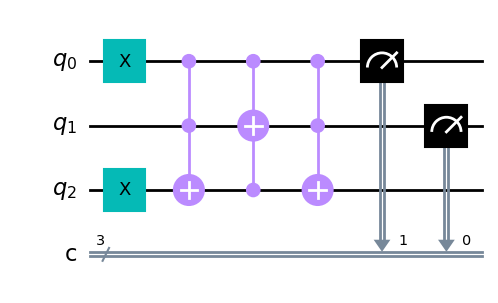

In [5]:
circ = QuantumCircuit(3,3)
simulator = QasmSimulator()

def cswap(q0, q1, q2):
    if q0 ==1 :
        circ.x(0)
    if q1 ==1 :
        circ.x(1)
    if q2 ==1 :
        circ.x(2)
    circ.ccx(0, 1, 2)
    circ.ccx(0, 2, 1)
    circ.ccx(0, 1, 2)
    
    #Measure :
    circ.measure([0,1],[1, 0])
    compiled_circuit = transpile(circ, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(circ)
    print(f"\nProba de qubits de sortie (1000 try) :",counts)


print("Intialiser les qubits : ex |110>")
q0 = int(input("q0 :"))
q1 = int(input("q1 :"))
q2 = int(input("q2 :"))
print(f"\n Qubits d'entrée : |{q0}{q1}{q2}> ")
cswap(q0, q1, q2)
circ.draw('mpl')
#circ.draw() # Draw with character not an image



## Exercice 3 : Etat de Bell
  
  Les états de Bell sont des états spécifiques que peuvent avoir deux qubits intriqués et indisociables. Voici les quatres états de Bell pour 2 qubits :
   
$$ \quad \quad \frac{1}{\sqrt{2}} \times ( \ket{00} + \ket{11}) $$
$$ \quad \quad \frac{1}{\sqrt{2}} \times ( \ket{01} + \ket{10}) $$
$$ \quad \quad \frac{1}{\sqrt{2}} \times ( \ket{00} - \ket{11}) $$
$$ \quad \quad \frac{1}{\sqrt{2}} \times ( \ket{01} - \ket{10}) $$

Ces états permettent de connaitre en mesurant un seul qubit l'état de l'autre qubits (Car ils sont intriqués)

On peut les obtenir à l'aide d'une porte Hadamar et d'une porte CNOT avce le bit de contrôle sur le qubit : 

$$ \quad \text{Voici l'action de la porte d'Hadamar : } \quad H_{{d}}\vert x=0 ,1\rangle ={\frac  {1}{{\sqrt  {2}}}}\left[\vert 0\rangle +\left(-1\right)^{{x}}\vert 1\rangle \right]. $$

$$ \text{ Avec Hadamar on aura le premier qubit :} \quad \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} \begin{matrix} \ket{0} \\ \ket{1} \end{matrix} $$ 
$$ \text{Soit le produit tensoriel avec le deuxième qubit |0> :}  
\\ 
 \quad \quad \frac{1}{\sqrt{2}} \times ( \ket{0} + \ket{1}) \otimes \ket{0} = \frac{1}{\sqrt{2}} \times ( \ket{00} + \ket{10})   $$
  
$$ \text{Puis avec l'application du CNOT  :} $$

$$ \frac{1}{\sqrt{2}} \times ( \ket{00} + \ket{1\color{orange}{1}}) $$ 

  

Intialiser les qubits : ex |01>

 Qubits d'entrée : |11> 

Proba de qubits de sortie (1000 try) : {'01': 511, '10': 513}


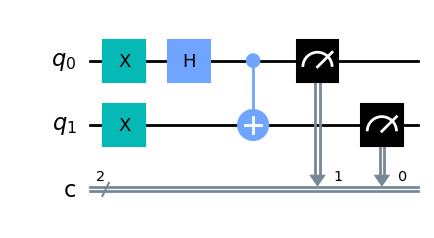

In [10]:
circ = QuantumCircuit(2,2)
simulator = QasmSimulator()

def etat_bell(q0, q1):
    if q0 ==1 :
        circ.x(0)
    if q1 ==1 :
        circ.x(1)
    circ.h(0)
    circ.cx(0, 1)
    
    #Measure :
    circ.measure([0,1],[1, 0])
    compiled_circuit = transpile(circ, simulator)
    job = simulator.run(compiled_circuit) 
    result = job.result()
    counts = result.get_counts(circ)
    print(f"\nProba de qubits de sortie (1000 try) :",counts)
    return counts


print("Intialiser les qubits : ex |01>")
q0 = int(input("q0 :"))
q1 = int(input("q1 :"))
print(f"\n Qubits d'entrée : |{q0}{q1}> ")
counts =etat_bell(q0, q1)
circ.draw('mpl')
#plot_histogram(counts)

### Mesure état de Bell avec un vrai ordinateur quantique :

configrc.store_credentials:WARNING:2022-10-29 15:14:44,652: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-10-29 15:14:45,089: Credentials are already in use. The existing account in the session will be replaced.


{'00': 47, '01': 1854, '10': 2010, '11': 89}


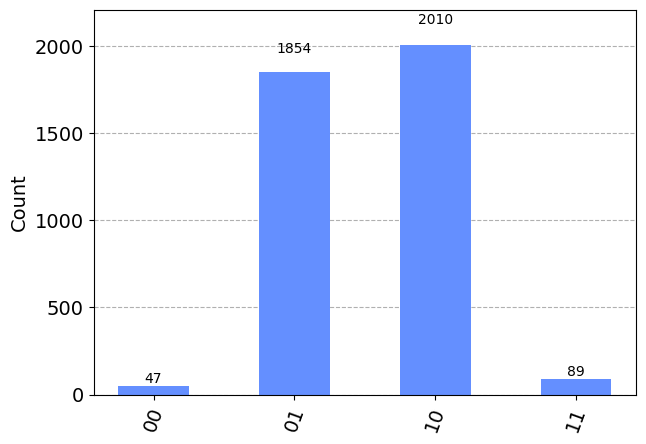

In [8]:
from qiskit import IBMQ

def init_circuit(RQ_nb, RC_nb):  # RQ : Registre Quantique | RC : Registre normal
    circ = QuantumCircuit(RQ_nb, RC_nb)
    return circ

def etat_bell( q0, q1):
    if q0 ==1 :
        circ.x(0)
    if q1 ==1 :
        circ.x(1)
    circ.h(0)
    circ.cx(0, 1)
    circ.measure([0,1],[1,0])
    counts = IBM(circ)
    return counts
   
def IBM(circuit):
    # Get the API token in
    # https://quantum-computing.ibm.com/
    IBMQ.save_account("4117d2afc2392481ebc1529f68ad7d77b46822875c4cb6d91c8ca77e2e3e9d8a6ef6426e6d28313729447c2c72b1309c9c15aecae36e4d0624224f575718f55f")
    Provider = IBMQ.load_account()
    #Backend class interfacing with an IBM Quantum Experience device (= ibm_quito).
    backend = Provider.get_backend('ibm_oslo')
    optimized_circuit = transpile(circuit, backend)
    optimized_circuit.draw()
    # run in real hardware
    job = backend.run(optimized_circuit)
    retrieved_job = backend.retrieve_job(job.job_id())
    result = retrieved_job.result()
    counts = result.get_counts()
    print(counts)

    return counts

circ = init_circuit(2,2)
counts = etat_bell(1, 1)
display(circ.draw('mpl'))
display(plot_histogram(counts))
    

Voici un résultat de la mesure d'un qubit en Etat de Bell réalisé par IBM_vigo :  
![BELL_STATE](Etat_Bell_IBM.png)

## Exercice 4: Téléportation


La téléportation quantique, est un algorithme qui permet de transmettre l'état d'un qubit à l'aide de deux qubits intriqués.  
Pour simuler la téléportation nous allos nous placer dans la situation suivante :  
ALice veut envoyer l'état de son qubit à Bob, le qubit à transmettre sera nommé $\psi$ (q0 dans le code). On met deux autres qubits en intrication quantique (état de Bell) et en donne un à Alice et un à Bob (q1 pour Alice, q2 pour Bob).

La procédure pour transmettre le qubit à Bob est la suivante on réutilise la propriété de la porte CNOT avec la porte d'Hadamard, Alice applique donc une porte CNOT controllé par $\ket{\psi}$, puis une porte hadamard sur $\ket{ \psi}$.
Une fois l'intrication quantique effectué elle mesure ces deux qubits et envoie le résultat à Bob (En mesurant elle fixe l'état de ces qubits et aussi celui de Bob).  
En fonction du résultat Bob applique ou non des portes sur son qubit pour retrouver l'état $\ket{ \psi}$.

Le qubit est dit téléporté car l'état du qubit $\ket{\psi}$ d'Alice n'est plus le même après l'envoi.

<IPython.core.display.Latex object>

Voci la mesure sur le qubit à transmettre et le qubit d'Alice : f[{'0': 655, '1': 345}, {'1': 485, '0': 515}, {'0': 1000}] 
Voci la mesure sur le qubit à transmettre et le qubit d'Alice : f[{'0': 636, '1': 364}, {'1': 517, '0': 483}, {'1': 514, '0': 486}] 


         Init qubit message(q0), Alice et Bob(q1,q2)  |  Transmition de q0 à Bob              | Bob lis le qubit transmis


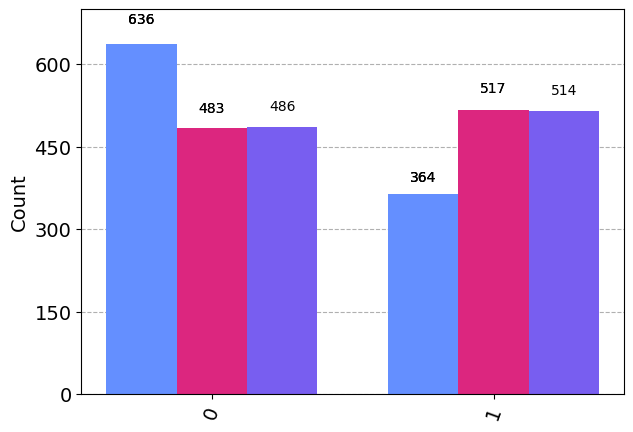

In [26]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex, plot_bloch_vector
from qiskit.extensions import Initialize
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector
# For IBM
from qiskit.tools.monitor import job_monitor


def etat_bell(circ, q1, q2):
    circ.h(q1)
    circ.cx(q1, q2)

def alice(circ, q0, q1):
    circ.cx(q0, q1)  # Cnot controllé par le qubit d'alice à envoyer
    circ.h(q1)      # Hadamar sur le qubit a envoyer

def bob(circ, c1, c2, q2):  # Bob a les bits classiques mesurer par Alice et q2 qui a été modifié par alice (car intriqué)
    if c1:
        circ.z(2)
    if c2:
        circ.x(2)

def mesure(circ, qbits_arr , sim_bool): #sim=0, on utilise IBM, sim!=1 on utilise le simulateur AEM
    cbits_arr = qbits_arr
    circ.measure(qbits_arr, cbits_arr)
    if sim_bool:
        counts = simulateur(circ)
    else :
        counts = IBM(circ)
    
    return counts

def simulateur(circuit):
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(circuit)
    qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
    #plot_histogram(counts)
    return qubit_counts

def IBM(circuit):
    # Get the API token in
    # https://quantum-computing.ibm.com/
    IBMQ.save_account("4117d2afc2392481ebc1529f68ad7d77b46822875c4cb6d91c8ca77e2e3e9d8a6ef6426e6d28313729447c2c72b1309c9c15aecae36e4d0624224f575718f55f")
    Provider = IBMQ.load_account()
    #Backend class interfacing with an IBM Quantum Experience device (= ibm_oslo).
    backend = Provider.get_backend('ibm_oslo')
    optimized_circuit = transpile(circuit, backend)
    optimized_circuit.draw()
    # run in real hardware
    job = backend.run(optimized_circuit)
    retrieved_job = backend.retrieve_job(job.job_id())
    result = retrieved_job.result()
    counts = result.get_counts()
    qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
    print(counts)

    return qubit_counts

    


def initPsi(circ):
    psi = random_statevector(2)
    display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
    init_gate = Initialize(psi)
    init_gate.label = "init"
    inverse_init_gate = init_gate.gates_to_uncompute() # global for using it at the end of the circ
    circ.append(init_gate,[0]) 

    return psi, inverse_init_gate

Aer.backends()
simulator = Aer.get_backend('aer_simulator')
qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz, crx = ClassicalRegister(1, name="crz"),ClassicalRegister(1, name="crx") # in 2 different registers
cB = ClassicalRegister(1, name="cB")
tp_circ = QuantumCircuit(qr, crz, crx, cB)

psi , inverse_init_gate= initPsi(tp_circ) # Pour le simulateur avec un random qubit Psi avec alpha et beta
#plot_bloch_vector(psi)

etat_bell(tp_circ, 1, 2) # On met le qubit de Telemon en etat de bell
tp_circ.barrier() # barrière pour séparer les étapes

alice(tp_circ, 0, 1) # Permet de transmettre l'info au qbit 2
counts1 = mesure(tp_circ, [0, 1], 1)
print(f"Voci la mesure sur le qubit à transmettre et le qubit d'Alice : f{counts1} ")
tp_circ.barrier()

bob(tp_circ, crz, crx, 2) 
tp_circ.save_statevector()
out_vector = simulator.run(tp_circ).result().get_statevector()
plot_bloch_multivector(out_vector)

tp_circ.append(inverse_init_gate, [2])
tp_circ.measure(2,2)
counts2 = simulateur(tp_circ)
print(f"Voci la mesure sur le qubit à transmettre et le qubit d'Alice : f{counts2} ")
print("\n\n         Init qubit message(q0), Alice et Bob(q1,q2)  |  Transmition de q0 à Bob              | Bob lis le qubit transmis")

plot_histogram(counts2)
#tp_circ.draw('mpl')




In [ ]:
## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

## STEP 5
# reverse the initialization process
qc.append(inverse_init_gate, [2])

# Need to add a new ClassicalRegister
# to see the result
cr_result = ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(2,2)
qc.draw()

t_qc = transpile(qc, sim)
t_qc.save_statevector()
counts = sim.run(t_qc).result().get_counts()
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
plot_histogram(qubit_counts)